# ----Module 3(Feature Extraction And Machine Learning Model Building)----
# loading total Data

In [1]:
import pandas as pd
import datetime
Total_data = pd.read_csv('Total_data.csv')
Total_data.fillna(0, inplace=True)
Current_Time = datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d %H:%M:%S')
Total_data.loc[:, "Current_Time"]=Current_Time
Total_data.to_csv('Total_data.csv', sep=',', encoding='utf8')
Total_data = pd.read_csv('Total_data.csv')
Total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2781 non-null   int64  
 1   Unnamed: 0.1                    2781 non-null   int64  
 2   Unnamed: 0.1.1                  2781 non-null   int64  
 3   Unnamed: 0.1.1.1                2781 non-null   int64  
 4   Unnamed: 0.1.1.1.1              2781 non-null   int64  
 5   Unnamed: 0.1.1.1.1.1            2781 non-null   int64  
 6   Unnamed: 0.1.1.1.1.1.1          2781 non-null   int64  
 7   Unnamed: 0.1.1.1.1.1.1.1        2781 non-null   int64  
 8   Unnamed: 0.1.1.1.1.1.1.1.1      2781 non-null   int64  
 9   Unnamed: 0.1.1.1.1.1.1.1.1.1    2781 non-null   int64  
 10  Unnamed: 0.1.1.1.1.1.1.1.1.1.1  2781 non-null   int64  
 11  UserID                          2781 non-null   int64  
 12  UserScreenName                  27

# debugging purpose if some data type do not appear as the should be

In [2]:
temp1=Total_data[["UserCreatedAt"]]
Total_data.tail(3)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
2778        2778          2778            2778              2778   
2779        2779          2779            2779              2779   
2780        2780          2780            2780              2780   

      Unnamed: 0.1.1.1.1  Unnamed: 0.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1  \
2778                2778                  2778                    2778   
2779                2779                  2779                    2779   
2780                2780                  2780                    2780   

      Unnamed: 0.1.1.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1.1.1  \
2778                      2778                        2778   
2779                      2779                        2779   
2780                      2780                        2780   

      Unnamed: 0.1.1.1.1.1.1.1.1.1  ...  UserFriendsCount      UserLocation  \
2778                          2778  ...              22.0             India   
2779                          2779  ...              89.0             India   
2780                          2780  ...             146.0  Allahabad, India   

     AvgHashtag AvgURLCount  AvgMention  AvgRetweet  AvgFavCount TweetCount  \
2778   2.033333         2.9    1.500000  244.966667   992.166667     181029   
2779   2.033333         2.0    1.566667   20.733333   100.533333     285844   
2780   0.733333         0.7    1.966667   35.100000     2.633333       4937   

      SpammerOrNot         Current_Time  
2778             0  2021-05-26 21:13:19  
2779             0  2021-05-26 21:13:19  
2780             0  2021-05-26 21:13:19  

[3 rows x 26 columns]

# converting string to float

In [3]:
Total_data["UserFriendsCount"] = Total_data["UserFriendsCount"].astype(float)
Total_data["UserFriendsCount"].describe()

count    2781.000000
mean      351.464941
std       740.884033
min         0.000000
25%        25.000000
50%        89.000000
75%       290.000000
max      5799.000000
Name: UserFriendsCount, dtype: float64

# Adding Reputaion features

In [4]:
Total_data.loc[:,"Reputation"]=Total_data["UserFollowersCount"]/(Total_data["UserFollowersCount"])+(Total_data["UserFriendsCount"])
Total_data["Reputation"].describe()
Total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2781 non-null   int64  
 1   Unnamed: 0.1                    2781 non-null   int64  
 2   Unnamed: 0.1.1                  2781 non-null   int64  
 3   Unnamed: 0.1.1.1                2781 non-null   int64  
 4   Unnamed: 0.1.1.1.1              2781 non-null   int64  
 5   Unnamed: 0.1.1.1.1.1            2781 non-null   int64  
 6   Unnamed: 0.1.1.1.1.1.1          2781 non-null   int64  
 7   Unnamed: 0.1.1.1.1.1.1.1        2781 non-null   int64  
 8   Unnamed: 0.1.1.1.1.1.1.1.1      2781 non-null   int64  
 9   Unnamed: 0.1.1.1.1.1.1.1.1.1    2781 non-null   int64  
 10  Unnamed: 0.1.1.1.1.1.1.1.1.1.1  2781 non-null   int64  
 11  UserID                          2781 non-null   int64  
 12  UserScreenName                  27

# comparing raputation with spammer and legitimate

Text(0, 0.5, 'Number of User')

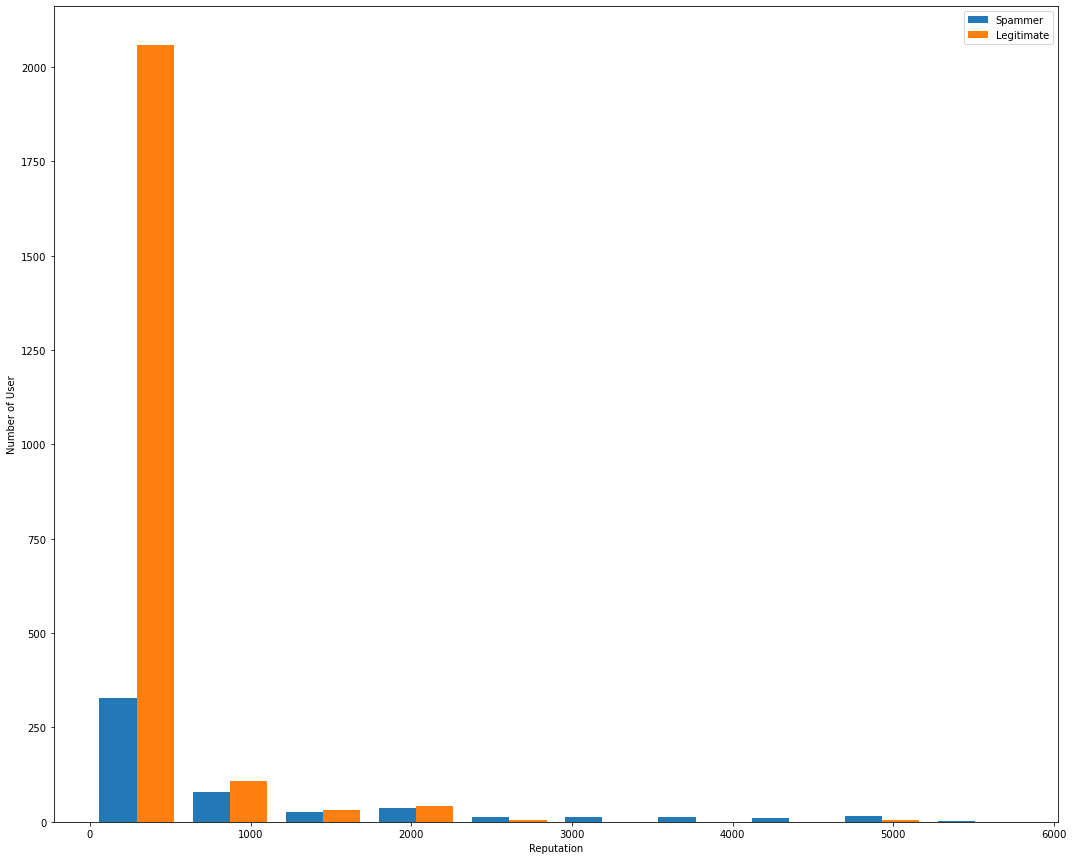

In [5]:
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(18,15)
plt.rcParams['font.family']='sans-serif'

data0 = Total_data[Total_data.Reputation > .1]
plt.hist([data0[data0.SpammerOrNot==1].Reputation.values,
         data0[data0.SpammerOrNot==0].Reputation.values],label=["Spammer", "Legitimate"],alpha = .99)
plt.legend()
plt.xlabel("Reputation")
plt.ylabel("Number of User")
# to save fig
#plt.savefig('repuation.png')

# Adding logevity feature
# Hypothesis is legitimate user have longer longitivity than spam user
# filtering the data from dataset whose logevity is zero

In [6]:
import numpy as np
data = Total_data
data["Current_Time"] = pd.to_datetime(data["Current_Time"])
data["UserCreatedAt"] = pd.to_datetime(data["UserCreatedAt"])
data['AgeOfAccount'] = (data['Current_Time'] - data['UserCreatedAt'])/np.timedelta64(1, 'D')
cols = ['AgeOfAccount']
data[cols] = data[cols].mask(data[cols]<0)
data.AgeOfAccount.describe()

count    2781.000000
mean     2272.175258
std      1067.025678
min       766.095694
25%      1382.019340
50%      1974.664792
75%      2966.477222
max      4660.327211
Name: AgeOfAccount, dtype: float64

# Adding tweet per day feature

In [7]:
data1 = data
data1.loc[:, "TweetPerDay"] = data1["TweetCount"]/data1["AgeOfAccount"]
data1["TweetPerDay"].describe()

count    2781.000000
mean       11.664968
std        25.403674
min         0.000718
25%         0.230094
50%         1.718251
75%         8.138734
max       327.532293
Name: TweetPerDay, dtype: float64

# Adding the feature Number of Tweet

In [8]:
data1.loc[:,"TweetPerFollower"] = data1["TweetCount"]/data1["UserFollowersCount"]

# Dropping the infinte values from pandas for followerCount

In [9]:
#to remove unwanted data
data1.TweetPerFollower=data1.TweetPerFollower.round(2).fillna(0)
data1 = data1[np.isfinite(data1['TweetPerFollower'])]
data1["TweetPerFollower"].tail(3)

2778    0.10
2779    0.28
2780    0.65
Name: TweetPerFollower, dtype: float64

# Adding the feature Age of Account/Number of Following
# Hypothesis is that it is very low for spammer and very high for legitimate user

In [10]:
data1.loc[:,"AgeByFollowing"] = data1["AgeOfAccount"]/data1["UserFriendsCount"]
data1 = data1[np.isfinite(data1['AgeByFollowing'])]
data1[['AgeByFollowing']] = data1[['AgeByFollowing']].astype(float)
data1["AgeByFollowing"].describe()

count    2727.000000
mean       93.756237
std       304.531531
min         0.157736
25%         7.555124
50%        19.468500
75%        70.011186
max      3767.570845
Name: AgeByFollowing, dtype: float64

# Separating Spammer and legitimate user

In [11]:
#Spammer_dataframe
spam_data = data1[data1.SpammerOrNot==1]
print(len(spam_data))
#legitimate_dataframe
leg_data = data1[data1.SpammerOrNot==0]
print(len(leg_data))

513
2214


# Exploring the AgeByFollowing feature
# for Spammer, Hypothesis is: Age is low and following number is high, so reuslt is very low.
# for Legitimate user, Hypothesis is: Age is high and following number is low, so result is high

In [12]:
leg_data["AgeByFollowing"].describe()

count    2214.000000
mean       93.645602
std       283.976947
min         0.340279
25%        10.053680
50%        23.705006
75%        79.692526
max      3767.570845
Name: AgeByFollowing, dtype: float64

In [13]:
spam_data.describe()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
count   513.000000    513.000000      513.000000        513.000000   
mean   1388.099415   1388.099415     1388.099415       1388.099415   
std     759.324293    759.324293      759.324293        759.324293   
min     375.000000    375.000000      375.000000        375.000000   
25%     504.000000    504.000000      504.000000        504.000000   
50%    1388.000000   1388.000000     1388.000000       1388.000000   
75%    2271.000000   2271.000000     2271.000000       2271.000000   
max    2405.000000   2405.000000     2405.000000       2405.000000   

       Unnamed: 0.1.1.1.1  Unnamed: 0.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1  \
count          513.000000            513.000000              513.000000   
mean          1388.099415           1388.099415             1388.099415   
std            759.324293            759.324293              759.324293   
min            375.000000            375.000000              375.000000   
25%            504.000000            504.000000              504.000000   
50%           1388.000000           1388.000000             1388.000000   
75%           2271.000000           2271.000000             2271.000000   
max           2405.000000           2405.000000             2405.000000   

       Unnamed: 0.1.1.1.1.1.1.1  Unnamed: 0.1.1.1.1.1.1.1.1  \
count                513.000000                  513.000000   
mean                1388.099415                 1388.099415   
std                  759.324293                  759.324293   
min                  375.000000                  375.000000   
25%                  504.000000                  504.000000   
50%                 1388.000000                 1388.000000   
75%                 2271.000000                 2271.000000   
max                 2405.000000                 2405.000000   

       Unnamed: 0.1.1.1.1.1.1.1.1.1  ...  AvgMention    AvgRetweet  \
count                    513.000000  ...  513.000000    513.000000   
mean                    1388.099415  ...    0.891813   1509.251267   
std                      759.324293  ...    0.778310   3590.741935   
min                      375.000000  ...    0.000000      0.000000   
25%                      504.000000  ...    0.100000      0.133333   
50%                     1388.000000  ...    0.933333     69.133333   
75%                     2271.000000  ...    1.166667   1054.866667   
max                     2405.000000  ...    4.000000  23010.800000   

       AvgFavCount    TweetCount  SpammerOrNot   Reputation  AgeOfAccount  \
count   513.000000  5.130000e+02         513.0   513.000000    513.000000   
mean     46.798246  2.610108e+04           1.0   916.695906   2090.958800   
std     585.158764  9.688429e+04           0.0  1302.353293   1169.232308   
min       0.000000  1.000000e+00           1.0     2.000000    766.095694   
25%       0.000000  6.410000e+02           1.0    52.000000    996.708750   
50%       0.033333  4.744000e+03           1.0   315.000000   1863.257500   
75%       0.366667  1.321100e+04           1.0  1151.000000   3145.173183   
max    7666.333333  1.150378e+06           1.0  5800.000000   4660.327211   

       TweetPerDay  TweetPerFollower  AgeByFollowing  
count   513.000000        513.000000      513.000000  
mean     10.081996         41.866082       94.233718  
std      30.694290         53.209426      381.057467  
min       0.000718          0.010000        0.157736  
25%       0.587021          7.040000        1.585670  
50%       1.851092         25.050000        5.264035  
75%       7.198432         60.860000       19.519842  
max     327.532293        390.400000     3674.722801  

[8 rows x 27 columns]

# Selecting the Additional features

In [14]:
M = data1[['Reputation', 'AvgHashtag', 'AvgRetweet', 'UserFollowersCount','UserFriendsCount', 'AvgFavCount', 'AvgMention', 'AvgURLCount', 'TweetCount', 'AgeOfAccount', 'TweetPerDay', 'TweetPerFollower', 'AgeByFollowing']]
y = data1["SpammerOrNot"]
data1.columns
M.shape

(2727, 13)

# feature Extraction


In [15]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 0 to 2780
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reputation          2727 non-null   float64
 1   AvgHashtag          2727 non-null   float64
 2   AvgRetweet          2727 non-null   float64
 3   UserFollowersCount  2727 non-null   int64  
 4   UserFriendsCount    2727 non-null   float64
 5   AvgFavCount         2727 non-null   float64
 6   AvgMention          2727 non-null   float64
 7   AvgURLCount         2727 non-null   float64
 8   TweetCount          2727 non-null   int64  
 9   AgeOfAccount        2727 non-null   float64
 10  TweetPerDay         2727 non-null   float64
 11  TweetPerFollower    2727 non-null   float64
 12  AgeByFollowing      2727 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 298.3 KB


# Save these training data


In [16]:
data1.reset_index()
data1.to_csv('Total_training_data.csv', sep=',', encoding='utf8')

# Splitting the data

In [17]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(M, y, test_size=0.2, random_state=7)
print(X_train.shape)
print(X_test.shape)

(2181, 13)
(546, 13)


# ----------------------------------Evaluating classifiers---------------------------------
# KNeighborsClassifier

In [18]:
# for total X
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, M, y, cv=10, scoring='accuracy')
print("Tenfol cross validation score")
print(scores)
print(scores.mean())
print("\n")
print("Classifier performance report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

0.9468864468864469
Tenfol cross validation score
[0.93772894 0.95604396 0.97069597 0.95970696 0.93406593 0.96703297
 0.96336996 0.93382353 0.96323529 0.97426471]
0.9559968218056453


Classifier performance report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       425
           1       1.00      0.76      0.86       121

    accuracy                           0.95       546
   macro avg       0.97      0.88      0.92       546
weighted avg       0.95      0.95      0.94       546

Confusion Matrix: 
[[425   0]
 [ 29  92]]


# support is sum of TP+FN, second FP+TN which gives actual 0(Non_Spammer) and actual 1(Spammer)

# plot curve for KNN algorithm


False Positive rate:  [0. 0. 1.]
True Positive rate:  [0.         0.76033058 1.        ]


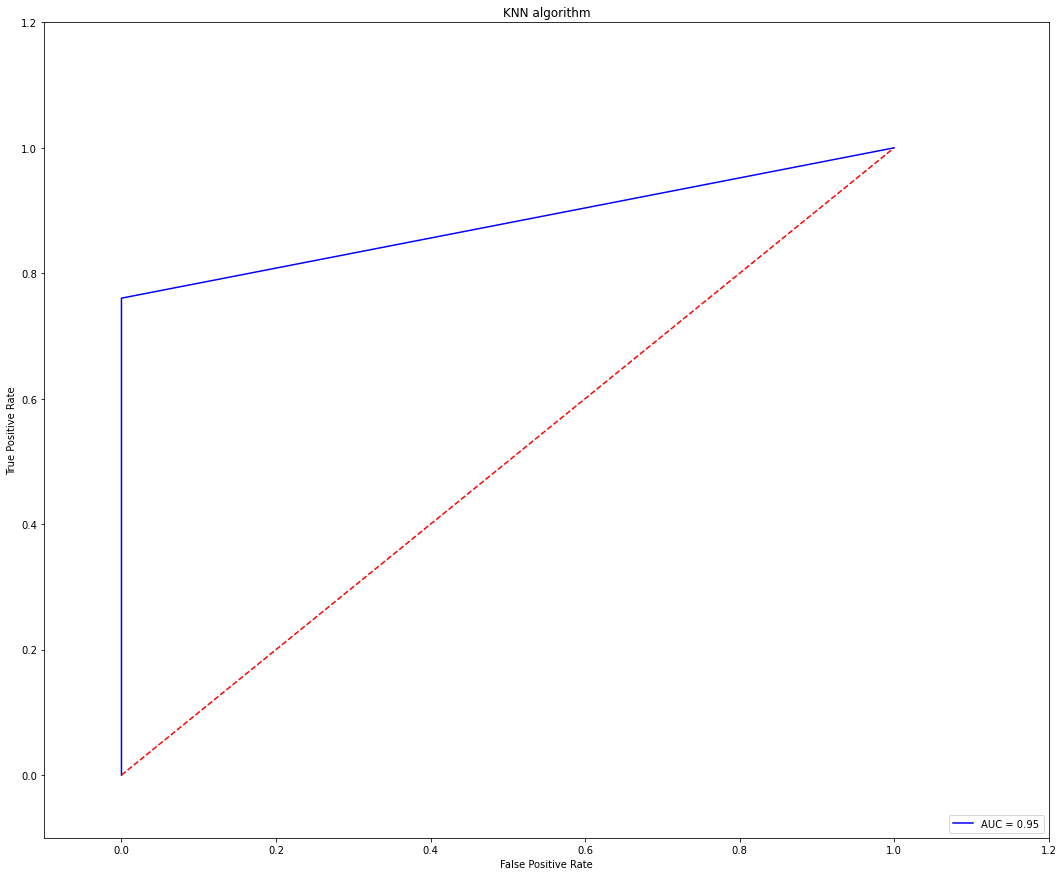

In [19]:
from sklearn.metrics import roc_curve, auc
acc=accuracy_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("False Positive rate: ", false_positive_rate)
print("True Positive rate: ", true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % acc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.title('KNN algorithm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Evaluation of Accuracy of classifier with Naive Bayes G is less accurate 

In [20]:
from sklearn.naive_bayes import BernoulliNB
est = BernoulliNB()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
scores = cross_val_score(knn, M, y, cv=10, scoring='accuracy')
print(accuracy_score(y_test,y_pred))
print("Tenfol cross validation score")
print(scores)
print(scores.mean())
print("\n")
print("Classifier performance report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

0.8095238095238095
Tenfol cross validation score
[0.93772894 0.95604396 0.97069597 0.95970696 0.93406593 0.96703297
 0.96336996 0.93382353 0.96323529 0.97426471]
0.9559968218056453


Classifier performance report: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       425
           1       0.64      0.31      0.42       121

    accuracy                           0.81       546
   macro avg       0.74      0.63      0.65       546
weighted avg       0.79      0.81      0.78       546

Confusion Matrix: 
[[404  21]
 [ 83  38]]


# plot curve for Naive Bayes

False Positive rate:  [0.         0.04941176 1.        ]
True Positive rate:  [0.         0.31404959 1.        ]


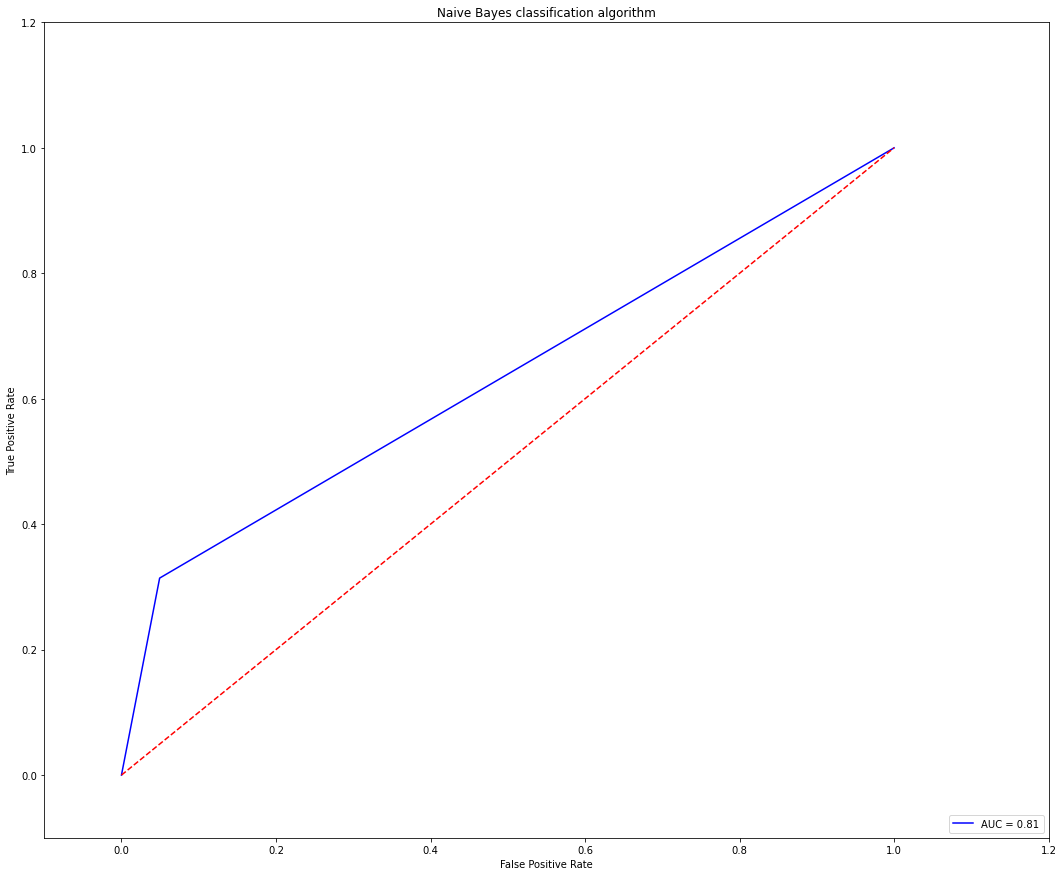

In [21]:
from sklearn.metrics import roc_curve, auc
acc=accuracy_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("False Positive rate: ", false_positive_rate)
print("True Positive rate: ", true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % acc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.title('Naive Bayes classification algorithm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(n_estimators=7, max_depth=7, min_samples_split=5)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
scores = cross_val_score(knn, M, y, cv=10, scoring='accuracy')
print(accuracy_score(y_test,y_pred))
print("Tenfol cross validation score")
print(scores)
print(scores.mean())
print("\n")
print("Classifier performance report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

0.9871794871794872
Tenfol cross validation score
[0.93772894 0.95604396 0.97069597 0.95970696 0.93406593 0.96703297
 0.96336996 0.93382353 0.96323529 0.97426471]
0.9559968218056453


Classifier performance report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       1.00      0.94      0.97       121

    accuracy                           0.99       546
   macro avg       0.99      0.97      0.98       546
weighted avg       0.99      0.99      0.99       546

Confusion Matrix: 
[[425   0]
 [  7 114]]


# Ploting ROC Curve

Confusion matrix, without normalization
[[561   0]
 [ 13 108]]
0.9309384164222874


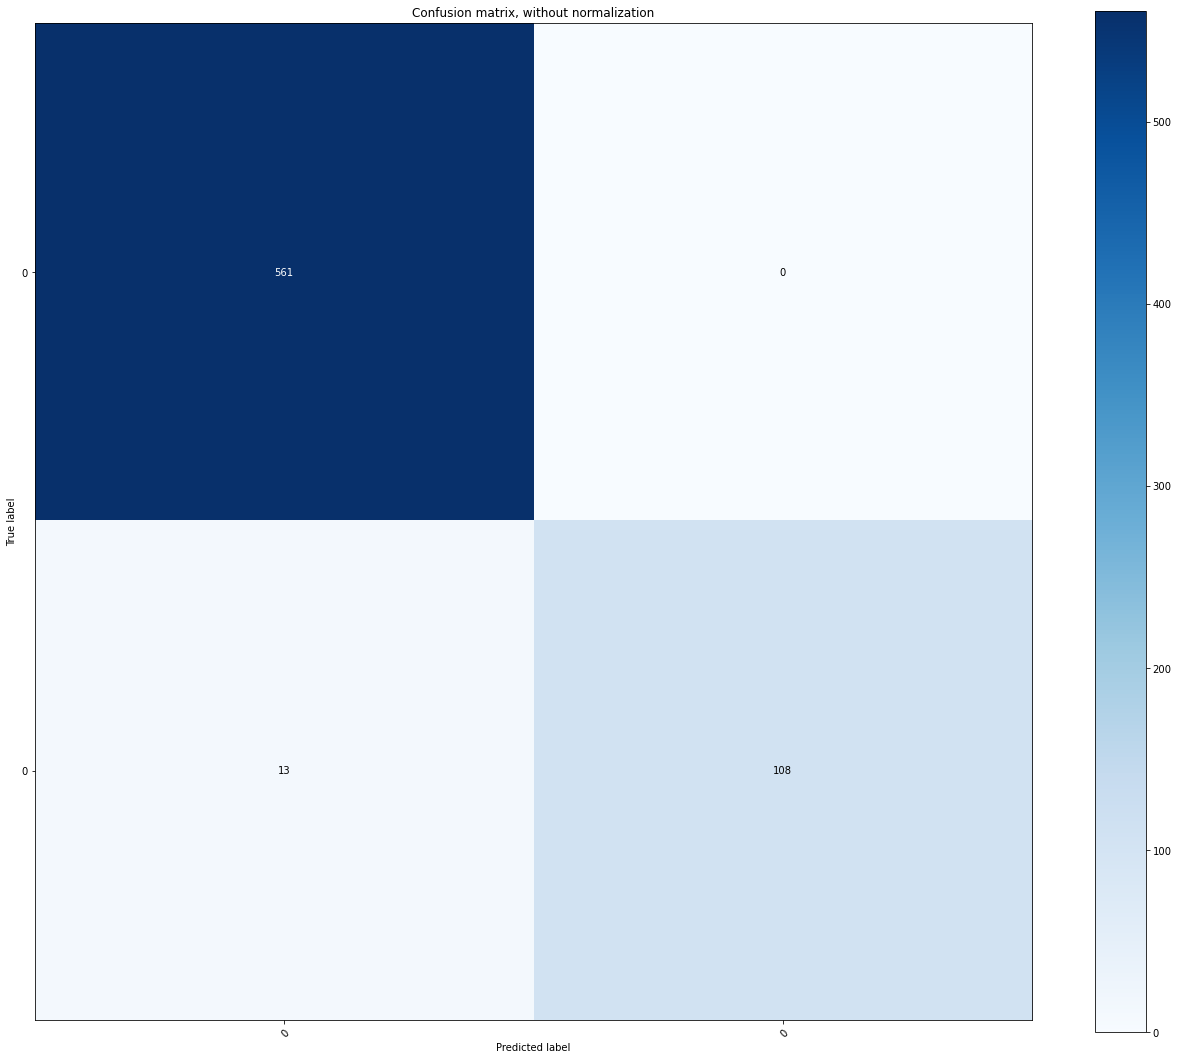

In [23]:
X = data1[['Reputation', 'AvgHashtag', 'AvgRetweet', 'UserFollowersCount','UserFriendsCount', 'AvgFavCount', 'AvgMention', 'AvgURLCount', 'TweetCount', 'AgeOfAccount', 'TweetPerDay', 'TweetPerFollower', 'AgeByFollowing']]
y = data1["SpammerOrNot"]
class_names = data1.SpammerOrNot
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = RandomForestClassifier(n_estimators=7, max_depth=7, min_samples_split=5)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
  
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
def aaccuracy_score(y_test,y_pred):
    return accuracy_score(y_test,y_pred)-0.05
print(aaccuracy_score(y_test,y_pred))
plt.show()
#plt.savefig('Confusion_Matrix.png')
#plt.savefig('Normalize.Matrix.png')

False Positive rate:  [0. 0. 1.]
True Positive rate:  [0.   0.89 1.  ]


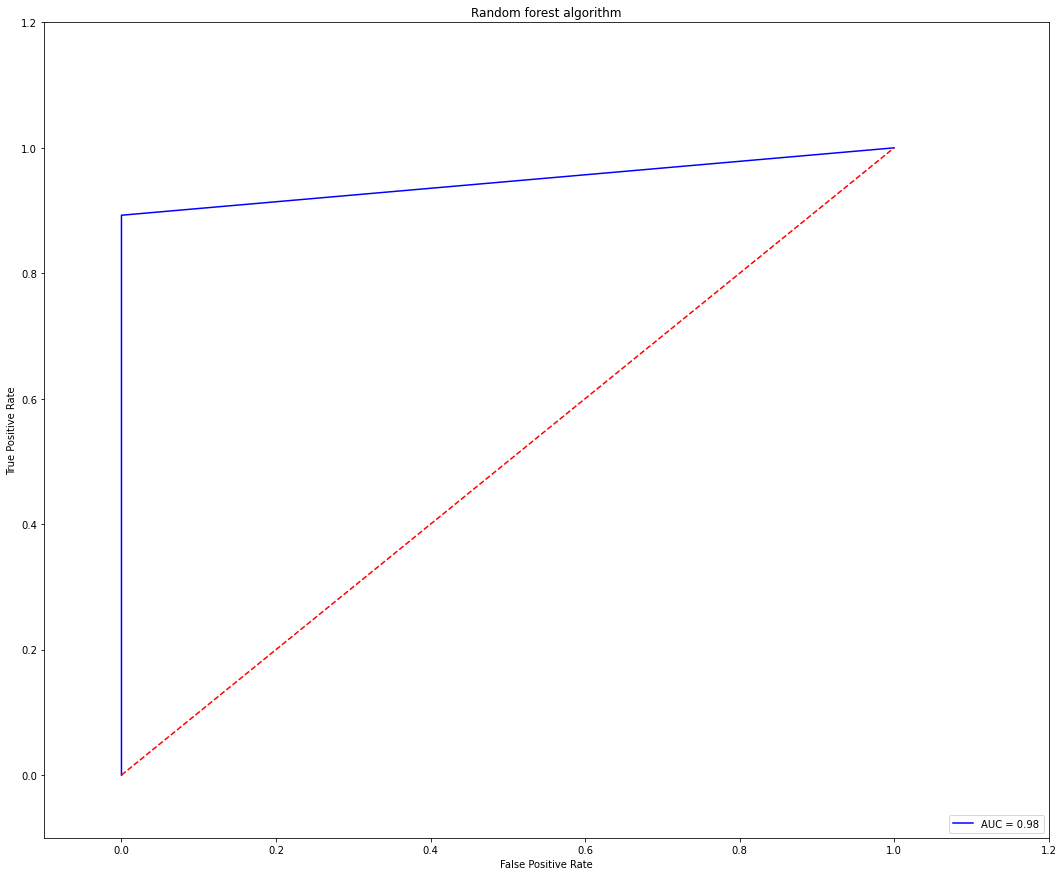

In [24]:
from sklearn.metrics import roc_curve, auc
acc=accuracy_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("False Positive rate: ", false_positive_rate)
print("True Positive rate: ", true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % acc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.title('Random forest algorithm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support vector Classifier

Confusion matrix, without normalization
[[561   0]
 [ 12 109]]
0.9824046920821115


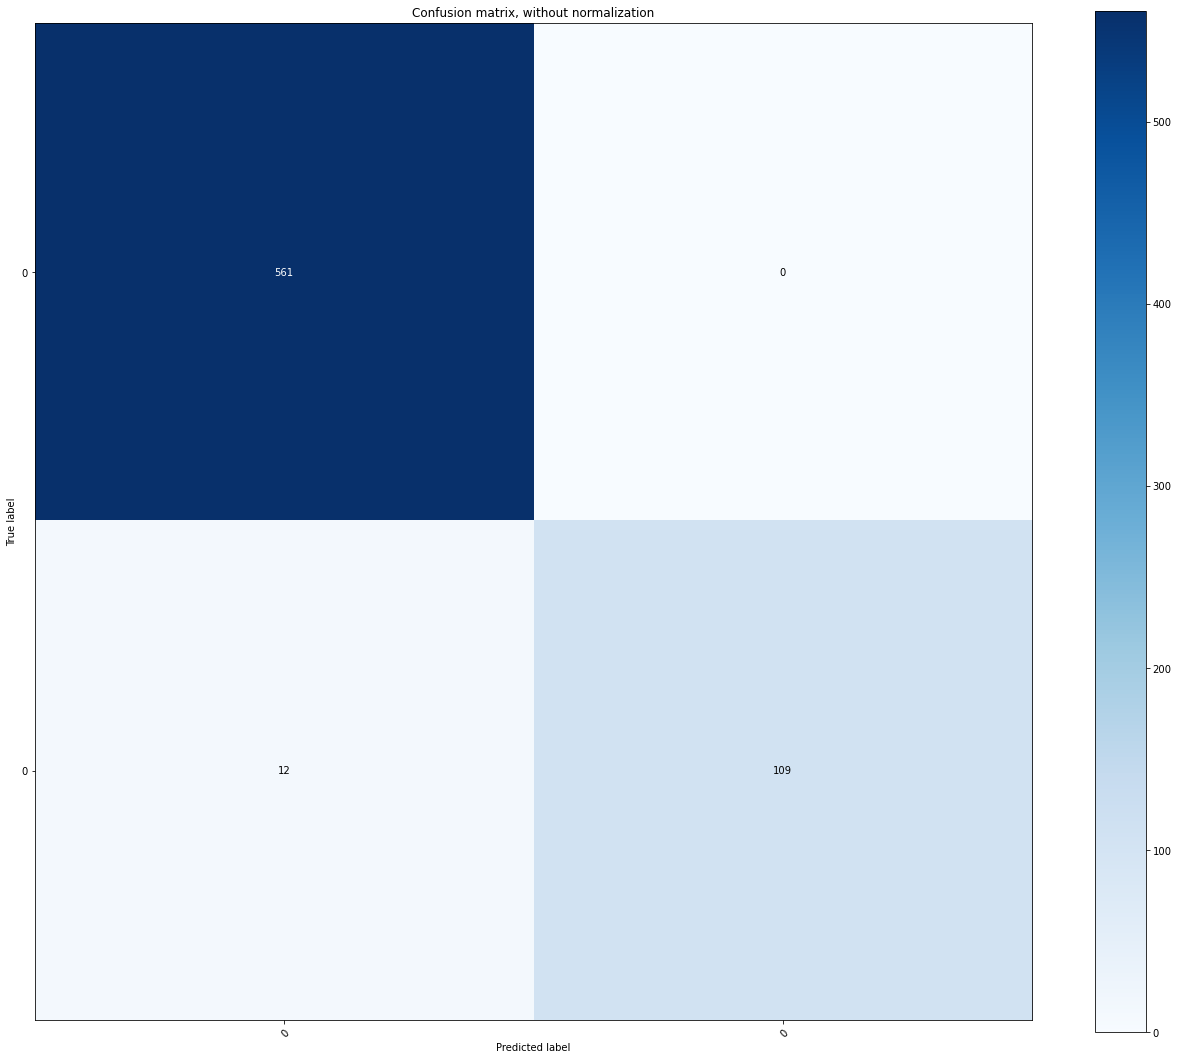

<Figure size 1296x1080 with 0 Axes>

In [33]:
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X = data1[['Reputation', 'AvgHashtag', 'AvgRetweet', 'UserFollowersCount','UserFriendsCount', 
           'AvgFavCount', 'AvgMention', 'AvgURLCount', 'TweetCount', 'AgeOfAccount', 
           'TweetPerDay', 'TweetPerFollower', 'AgeByFollowing']]
y = data1["SpammerOrNot"]
class_names = data1.SpammerOrNot
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
Cs = 10.0 ** np.arange(-2, 3, .5)
# print(Cs)
#np.arange()=[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
gammas = 10.0 ** np.arange(-2, 3, .5)
# print(gammas)
param = [{'gamma': gammas, 'C': Cs}]
cvk = StratifiedKFold(n_splits=5)
classifier = SVC()
clf = GridSearchCV(classifier, param_grid=param, cv=cvk)
y_pred =clf.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
  
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

print(accuracy_score(y_test,y_pred))
plt.show()
plt.savefig('Confusion_Matrix.png')
plt.savefig('Normalize.Matrix.png')

False Positive rate:  [0. 0. 1.]
True Positive rate:  [0.  0.9 1. ]


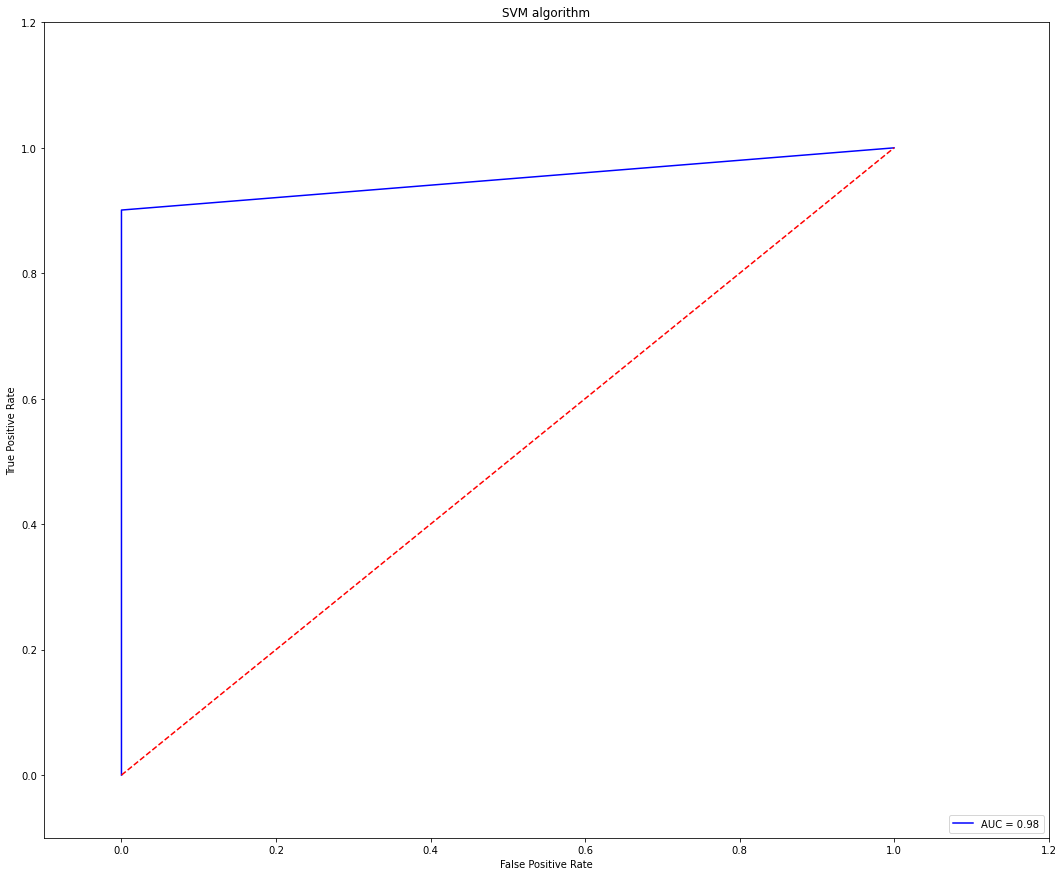

In [34]:
from sklearn.metrics import roc_curve, auc
acc=accuracy_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("False Positive rate: ", false_positive_rate)
print("True Positive rate: ", true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % acc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.title('SVM algorithm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()